In [2]:
import os
import pickle as pickle
import tensorflow as tf
import numpy as np
from Simulation import buffer_simulation, save_obj, load_obj
import pandas as pd
from datetime import datetime
from pandas import ExcelWriter
from openpyxl import Workbook
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.ticker as ticker
from pylab import *
from IPython.display import display,HTML
import cufflinks as cf
import plotly.offline as py

In [3]:
Weig_actv  = pd.read_excel('MoRS\Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Grafics.xlsx',sheet_name='Wights_Actvs_ECC_NoECC_tesis_7')
graf_Weig_actvs= Weig_actv.set_index("Voltajes")
graf_Weig_actvs

,Weights & No ECC,Activations & No ECC,Weights & ECC,Activations & ECC
Voltajes,,,,
0.51,0.138890,0.144284,0.136774,0.137226
0.52,0.124552,0.145854,0.153191,0.158717
0.53,0.187495,0.161183,0.502115,0.326477
0.54,0.435232,0.286481,0.776404,0.655161
0.55,0.699001,0.391792,0.903476,0.821150
0.56,0.859734,0.589014,0.957218,0.932979
0.57,0.932905,0.694538,0.984368,0.996264
0.58,0.982158,0.868562,0.990655,0.992705
0.59,1.000000,0.965703,1.000000,1.000838


range(0, 10)


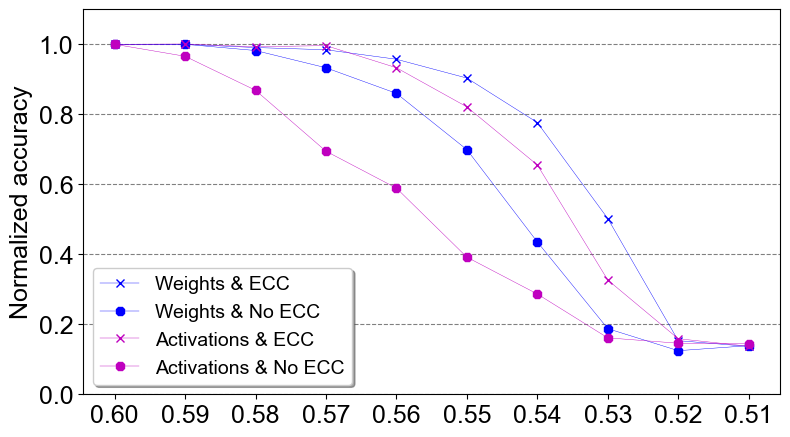

<Figure size 640x480 with 0 Axes>

In [9]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
#from datetime import datetime
import time



plt.rcParams['font.size'] = 18  # Tamaño de letra
plt.rcParams['font.family'] = 'Arial'
#plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif




l='0.3'
marksize=6

x=graf_Weig_actvs.index

#fig = plt.figure(figsize=(30,5), dpi=100)
fig1, ax2 = plt.subplots(figsize=(9,5))
x_values = range(len(x))
print(x_values)


#plt.xlabel("$V_{dd}$ (V)" )
plt.ylabel('Normalized accuracy')
#plt.xticks( fontsize= 12, fontfamily="serif" )
#plt.yticks( fontsize= 12, fontfamily="serif" )
ax2.set_ylim(0,1.1)
#ax2.set_xlabel("$V_{dd}$ (V)")
ax2.xaxis.set_label_coords(0.5, -0.15)





ax2.plot(graf_Weig_actvs["Weights & ECC"], label='Weights & ECC', color='b', ls='-', lw=l, marker='x', markersize=marksize)
ax2.plot(graf_Weig_actvs["Weights & No ECC"], label='Weights & No ECC', color='b', ls='-', lw=l, marker='8', markersize=marksize)
ax2.plot(graf_Weig_actvs["Activations & ECC"], label='Activations & ECC', color="m", ls='-', lw=l, marker='x', markersize=marksize)
ax2.plot(graf_Weig_actvs["Activations & No ECC"], label='Activations & No ECC', color="m", ls='-', lw=l, marker='8', markersize=marksize)
ax2.grid(axis='y', color = 'gray', linestyle = 'dashed')
ax2.legend(fontsize=14, shadow = True)
#ax2.set_xlim(0.51,0.61)
#ax2.xticks(np.arange(0, 60, 12))
ax2.set_xticks(np.arange(0.51, 0.61, 0.01))
ax2.invert_xaxis()

#plt.savefig('tesis_weights_acts_7redes.svg', format='svg',transparent = True, bbox_inches = 'tight', pad_inches = 0)

plt.savefig('tesis_weights_acts_7redes.png', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#
plt.tight_layout()



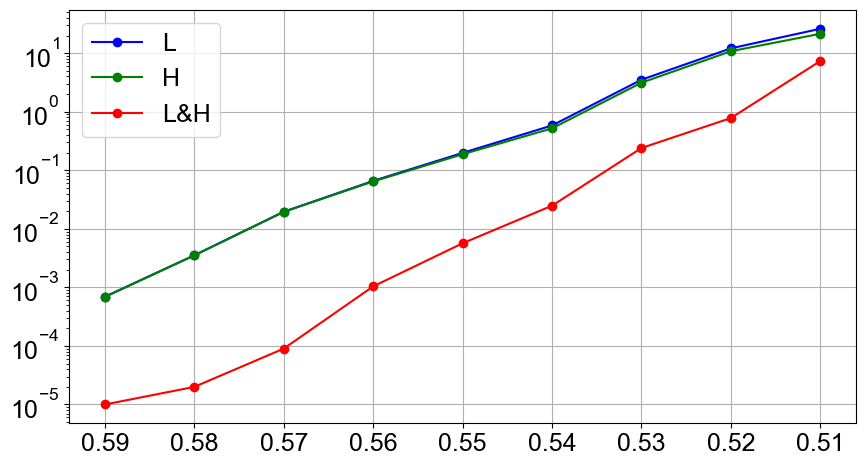

In [18]:
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams['font.size'] = 12  
#plt.rcParams['font.family'] = 'serif'  
#plt.rcParams['font.sans-serif'] = ['Arial']  

plt.rcParams['font.size'] = 18  # Tamaño de letra
plt.rcParams['font.family'] = 'Arial'
# Datos de la tabla
vdd_faulty = [0.59, 0.58, 0.57, 0.56, 0.55, 0.54]
vdd_ultrafaulty = [0.53, 0.52, 0.51]

faulty_L = [0.00069, 0.00353, 0.0196, 0.06587, 0.19819, 0.58236]
ultrafaulty_L = [3.52, 12.1, 26.10]

faulty_H = [0.00069, 0.00353, 0.01949, 0.06449, 0.18787, 0.51963]
ultrafaulty_H = [3.13, 10.80, 21.45]

#faulty_LH = [0.0, 0.00002, 0.00009, 0.00104, 0.00567, 0.02485]
faulty_LH = [1e-5, 0.00002, 0.00009, 0.00104, 0.00567, 0.02485]
ultrafaulty_LH = [0.24, 0.78, 7.35]

# Crear gráfica
plt.figure(figsize=(9, 5))


# Unificar líneas continuas para evitar separación visual
plt.plot(vdd_faulty + vdd_ultrafaulty, faulty_L + ultrafaulty_L, label="L", marker="o", color="blue")
plt.plot(vdd_faulty + vdd_ultrafaulty, faulty_H + ultrafaulty_H, label="H", marker="o", color="green")
plt.plot(vdd_faulty + vdd_ultrafaulty, faulty_LH + ultrafaulty_LH, label="L&H", marker="o", color="red")

plt.yscale("log")
plt.gca().invert_xaxis()
#plt.xlabel("Vdd")
#plt.ylabel("Faulty Activations (%) - Log Scale" )
#plt.title("Faulty Activations by Vdd")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Faulty_Activations_Vdd.png', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

In [19]:
import pandas as pd
acc_low_and_high_Low_faulty=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/ACC_tipo_palabras_tecnicas.xlsx',sheet_name='graf_tesis_low-vdd_tesis_7nets', usecols=["Tecnic" ,"0.54 V","0.56 V","0.58 V"])
acc_low_and_high_Low_faulty= acc_low_and_high_Low_faulty.set_index("Tecnic")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
acc_low_and_high_Low_faulty
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])


,0.54 V,0.56 V,0.58 V
Tecnic,,,
LO,1.000449,-0.000449,0.000000
L&HO,0.908832,0.091916,-0.000299
HO,0.397156,0.460928,0.128593
LO,1.003066,-0.000146,0.000000
L&HO,1.001022,0.002044,-0.000292
HO,0.523650,0.473723,0.005985
LO,0.990469,0.006657,0.003631
L&HO,0.720121,0.275492,0.003782
HO,0.139486,0.509834,0.295613


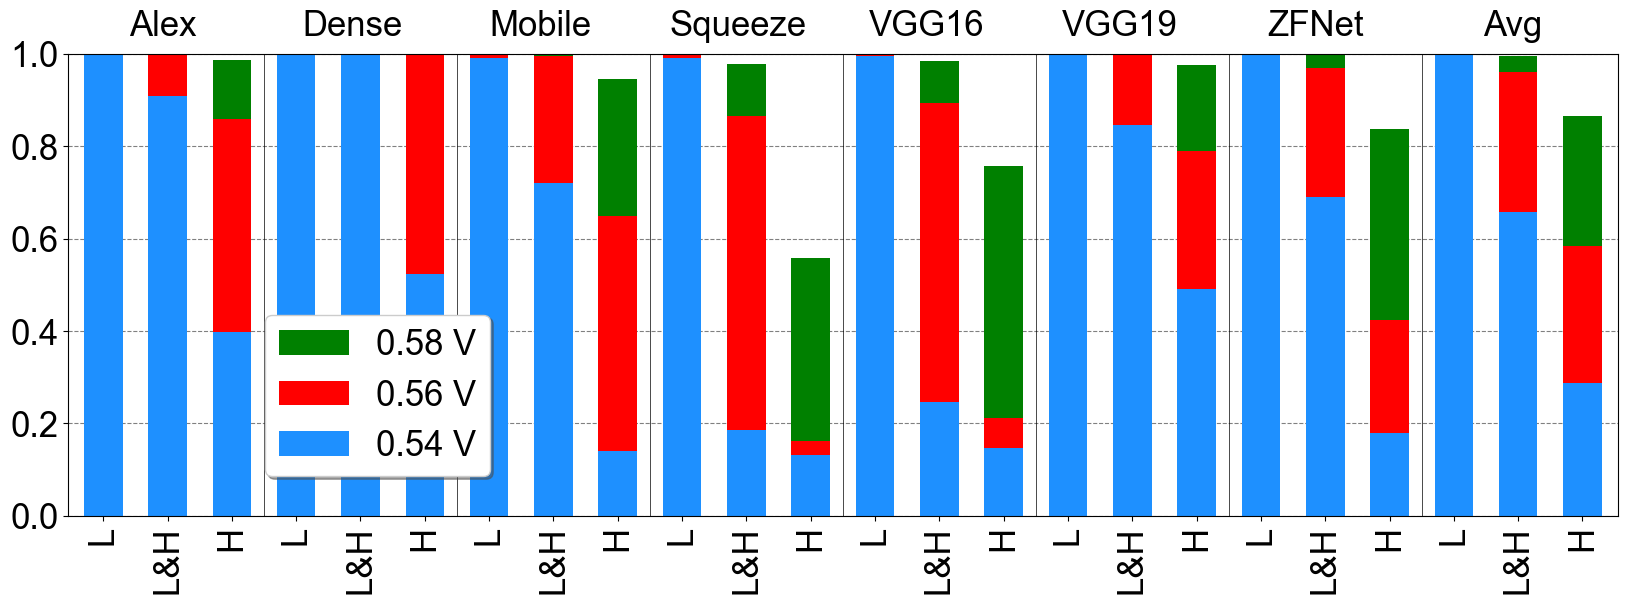

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile

#plt.rcParams['font.size'] = 33 # Tamaño de letra
#plt.rcParams['font.family'] = 'serif'  # Tipo de letra
#plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

plt.rcParams['font.size'] = 25  # Tamaño de letra
plt.rcParams['font.family'] = 'Arial'

n = len(acc_low_and_high_Low_faulty.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
coloresRedes = [ 'dodgerblue','red', 'green',]
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

bars=acc_low_and_high_Low_faulty.plot(kind ='bar' ,stacked = True,width = 0.60, color = coloresRedes,
                          figsize=(20,6),  zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)
xlabels=['L','L&H','H']*8
#plt.ylabel('Normalized accuracy')
plt.xticks(x, xlabels )

plt.ylim(0,1)

plt.xticks(rotation = 90 )
yticks_positions = np.arange(0, 1.02, 0.2)
plt.yticks(yticks_positions,rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')

handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc ="center",bbox_to_anchor=(0.2,0.26),shadow = True)


#plt.legend(fontsize=20)
#["0.58","0.56","0.54"]

plt.text(0.40, 1.04, 'Alex')
plt.text(3.1, 1.04, 'Dense')
plt.text(6.0, 1.04, 'Mobile')
plt.text(8.8, 1.04, 'Squeeze')
plt.text(11.9, 1.04, 'VGG16')
plt.text(14.9,1.04, 'VGG19')
plt.text(18.1, 1.04, 'ZFNet')
plt.text(21.45, 1.04, 'Avg')
##plt.text(24, 1.04,'Xcept' )
#plt.text(27, 1.04, 'ZFNet')
#plt.text(30, 1.04, 'Avg')

plt.axvline(x=2.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=8.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#mobil
plt.axvline(x=14.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=20.5, ymax= 5, color="black",linewidth=0.5)#vgg16
#plt.axvline(x=23.5, ymax= 5, color="black",linewidth=0.5)#vgg19
#plt.axvline(x=26.5, ymax= 5, color="black",linewidth=0.5)#xcep
#plt.axvline(x=29.5, ymax= 5, color="black",linewidth=0.5)#zf
plt.savefig('Tesis_acc_low_faulty_L_H_both_7nets.png', transparent = True, bbox_inches = 'tight', pad_inches = 0)

In [35]:
import pandas as pd
Poposed_1=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Grafics.xlsx',sheet_name='Resultados_proposed_1_7nets',usecols=["redes","Base","I-A ECC", "ECC","Flip","FaP"] )
Poposed_1= Poposed_1.set_index("redes")
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])


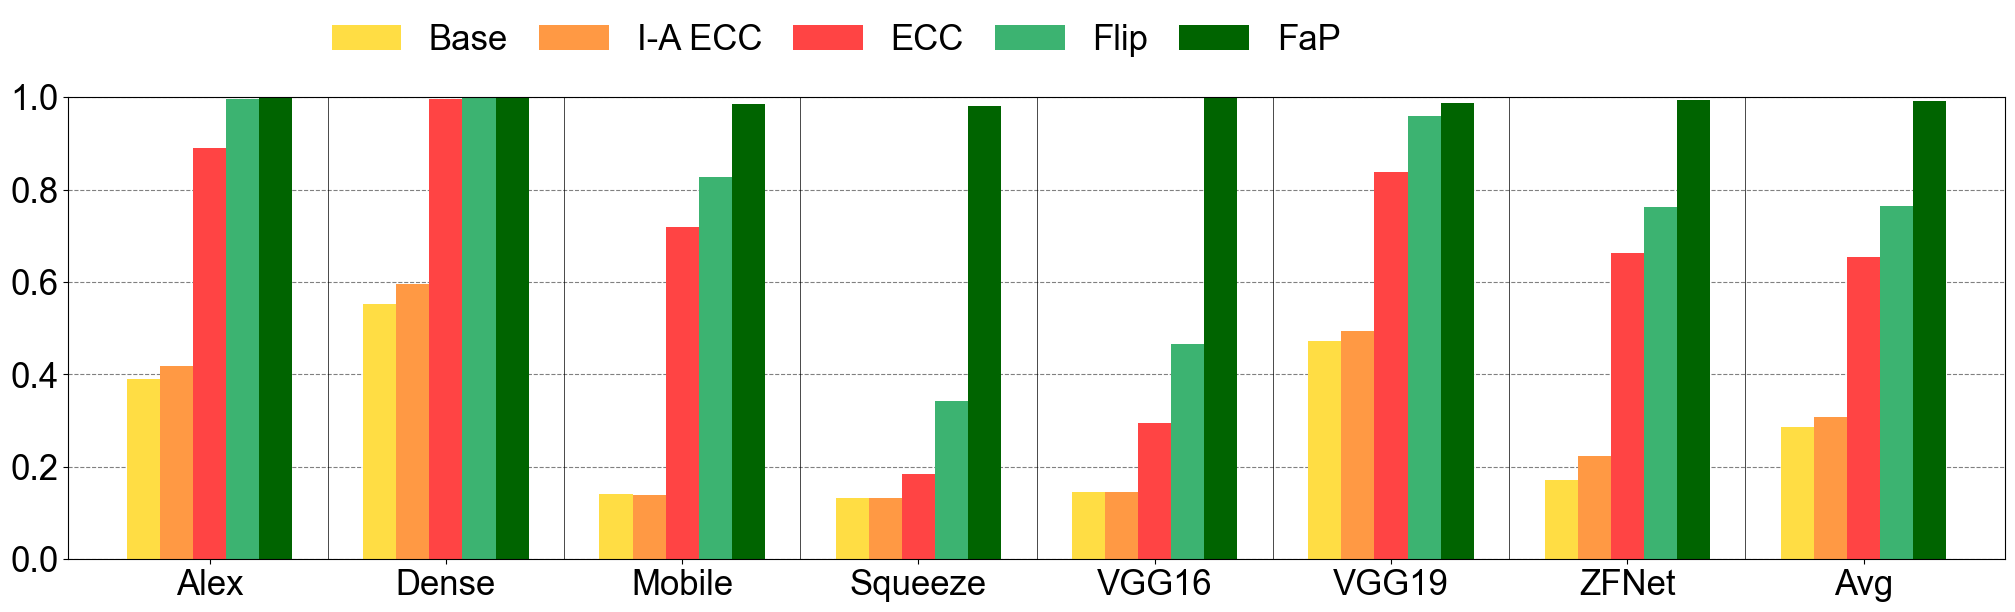

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
#plt.rcParams['font.size'] = 33 # Tamaño de letra
#plt.rcParams['font.family'] = 'serif'  # Tipo de letra
#plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif
plt.rcParams['font.size'] = 25  # Tamaño de letra
plt.rcParams['font.family'] = 'Arial'

n = len(Poposed_1.index)

 
x = np.arange(n)

coloresRedes = [ '#FFDD44','#FF9944','#FF4444','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(20,5), dpi=100)

Poposed_1.plot(kind ='bar', width = 0.70, color = coloresRedes, figsize=(25,6), zorder=2 );
#plt.legend(  fontsize=10, loc ="lower left",bbox_to_anchor=(0.1,0.1), shadow = True)
lg = plt.legend(  loc ="lower left",bbox_to_anchor=(0.12,1.02), shadow = False, ncol=5, columnspacing=0.9)
lg.draw_frame(False)
#plt.legend(  fontsize=11, bbox_to_anchor=(0.653,0.2),shadow = True)
plt.ylim(0,1.0)
#plt.ylabel('Normalized accuracy')
plt.xlabel('')
yticks_positions = np.arange(0, 1.02, 0.2)
plt.yticks(yticks_positions,rotation = 0)
plt.xticks(x, Poposed_1.index)
plt.xticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')

plt.axvline(x=0.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=1.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=2.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=3.5, ymax= 5, color="black",linewidth=0.5)#mobil
plt.axvline(x=4.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=6.5, ymax= 5, color="black",linewidth=0.5)#vgg16
#plt.axvline(x=7.5, ymax= 5, color="black",linewidth=0.5)#vgg19
#plt.axvline(x=8.5, ymax= 5, color="black",linewidth=0.5)#xcep
#plt.axvline(x=9.5, ymax= 5, color="black",linewidth=0.5)#zf
plt.savefig('resultados_proposed_1_7nets.png', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#pdfFile=PdfPages("Analizando_fichero_detalle\Alterado_fichero\concretando análisis\gráficos\Resumen_acc_experimentos.pdf")
#pdfFile.savefig(fig, transparent = True, bbox_inches = 'tight', pad_inches = 0)
#pdfFile.close()


In [31]:
import pandas as pd
Energia_Mors=pd.read_excel('MoRS/Analisis_Resultados/Energía_VBW/final_prestaciones_energia_SaS.xlsx',sheet_name='energy_Capítulo_6_tesis', usecols=["Redes","TUV", "FaP"])
Energia_Mors= Energia_Mors.set_index("Redes")
df = pd.DataFrame(Energia_Mors)
Energia_Mors

,TUV,FaP
Redes,,
Alex,0.949003,0.939779
Dense,0.934605,0.935519
Mobile,0.973134,0.935983
Squeeze,0.966081,0.935377
VGG16,0.974327,0.940426
VGG19,0.963937,0.940212
ZF,0.955994,0.940103
Avg,0.959583,0.938200


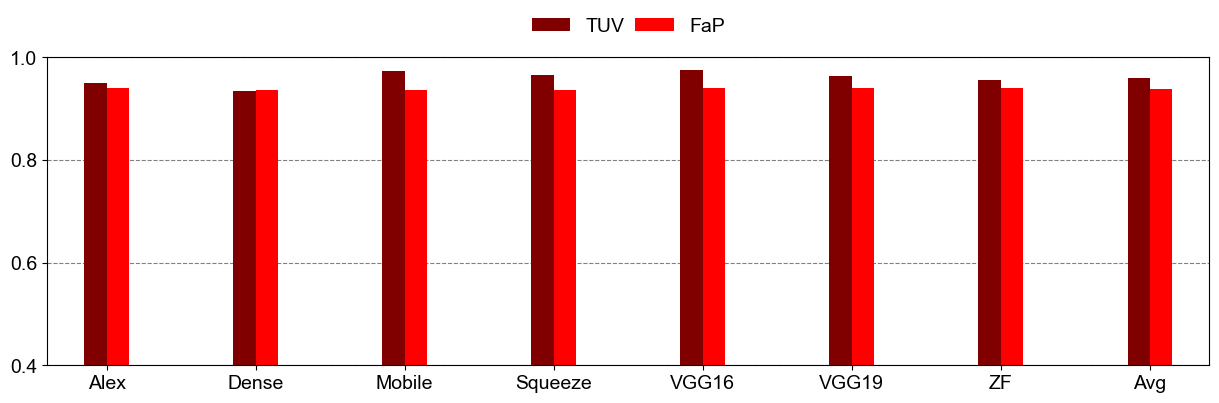

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile


#plt.rcParams['font.size'] = 12  # Tamaño de letra
#plt.rcParams['font.family'] = 'serif'  # Tipo de letra
#plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif
plt.rcParams['font.size'] = 14  # Tamaño de letra
plt.rcParams['font.family'] = 'Arial'


n = len(Energia_Mors.index)
x = np.arange(n)
coloresRedes = ['#800000','#FF0000','#ff7f0e', '#2ca02c','#1f77b4', ]
#coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(15,5), dpi=100)

bars=Energia_Mors.plot(kind ='bar' ,stacked = False,width = 0.30, color = coloresRedes,figsize=(15,4), zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

#plt.ylabel('Normalized energy')
plt.xticks(x, Energia_Mors.index )

lg = plt.legend(  loc ="center", bbox_to_anchor=(0.5,1.1),shadow = True, ncol=5, columnspacing=0.5)
lg.draw_frame(False)
#plt.legend(  loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0.4,1.0)
#bars.set_ylim(bottom=0, top=3)
plt.yticks(np.arange(0.4, 1.01, step=0.2))
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

#plt.xlabel('', fontsize=12)
plt.xlabel('')
#plt.xticks([])

plt.grid(axis='y', color = 'gray', linestyle = 'dashed')



plt.savefig('energia_Mors_tec_F_P_7nets.png', transparent = True, bbox_inches = 'tight', pad_inches = 0)


In [44]:
import pandas as pd
acc_low_and_high=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/ACC_tipo_palabras_tecnicas.xlsx',sheet_name='graf_tesis_ultra-vdd_7nets', usecols=["Tecnic" ,"0.53 V","0.52 V","0.51 V"])
acc_low_and_high= acc_low_and_high.set_index("Tecnic")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
acc_low_and_high
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])


,0.51 V,0.52 V,0.53 V
Tecnic,,,
LO,0.986377,0.010479,0.005090
L&HO,0.136527,0.224401,0.228892
HO,0.147904,-0.014222,0.069461
LO,0.999270,0.003650,-0.000292
L&HO,0.128467,0.311241,0.298686
HO,0.128467,0.000000,0.004672
LO,0.826021,0.018911,0.132526
L&HO,0.137973,0.001210,0.004841
HO,0.138427,-0.000303,0.001059


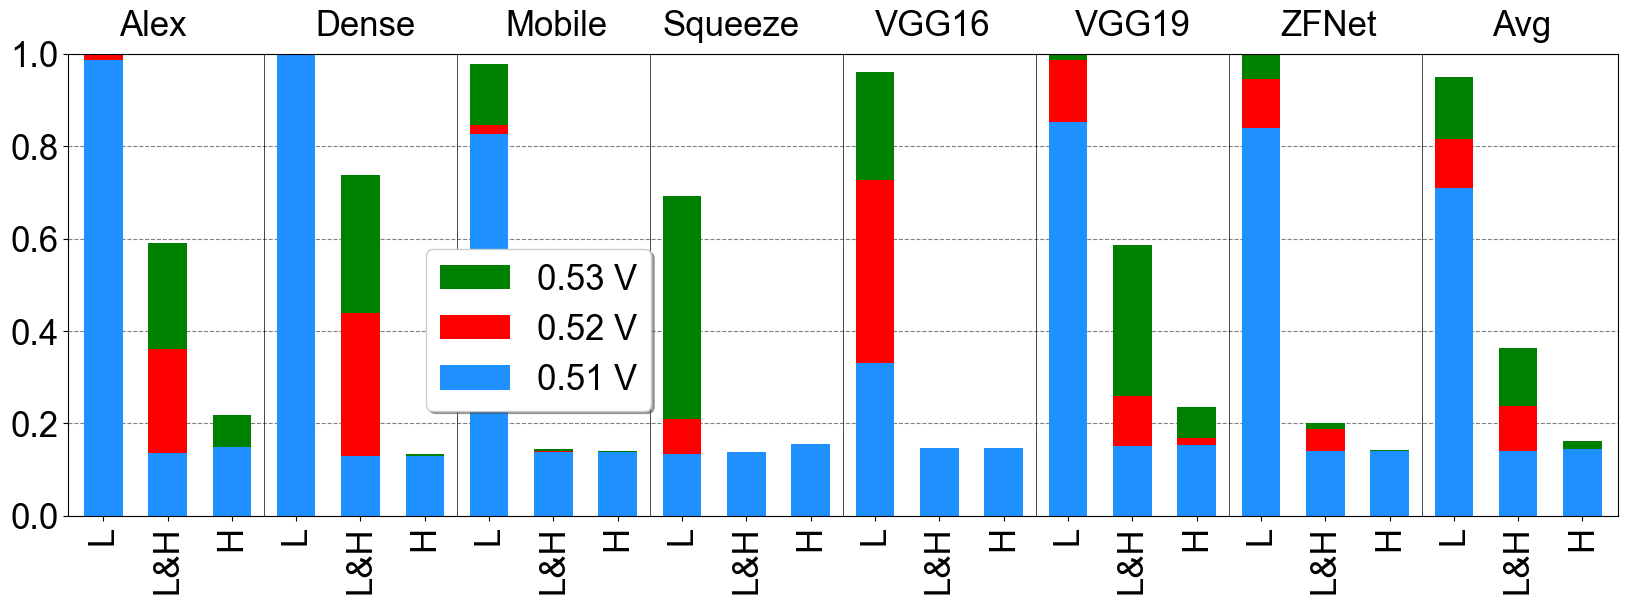

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile

#plt.rcParams['font.size'] = 33 # Tamaño de letra
#plt.rcParams['font.family'] = 'serif'  # Tipo de letra
#plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif
plt.rcParams['font.size'] = 25  # Tamaño de letra
plt.rcParams['font.family'] = 'Arial'


n = len(acc_low_and_high.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
coloresRedes = [ 'dodgerblue','red', 'green',]
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

bars=acc_low_and_high.plot(kind ='bar' ,stacked = True,width = 0.60, color = coloresRedes,
                          figsize=(20,6),  zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

xlabels=['L','L&H','H']*8
#plt.ylabel('Normalized accuracy')
plt.xticks(x, xlabels )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0,1)

plt.xticks(rotation = 90)
yticks_positions = np.arange(0, 1.02, 0.2)
plt.yticks(yticks_positions,rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')

handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc ="lower left",bbox_to_anchor=(0.22,0.19),shadow = True)
#plt.legend(fontsize=14,loc ="lower left", shadow = True)
#["0.58","0.56","0.54"]

plt.text(0.25, 1.04, 'Alex')
plt.text(3.3, 1.04, 'Dense')
plt.text(6.25, 1.04, 'Mobile')
plt.text(8.7, 1.04, 'Squeeze')
plt.text(12, 1.04, 'VGG16')
plt.text(15.1,1.04, 'VGG19')
plt.text(18.3, 1.04, 'ZFNet')
plt.text(21.6, 1.04, 'Avg')
#plt.text(24, 1.04,'Xcept' )
#plt.text(27, 1.04, 'ZFNet')
#plt.text(30, 1.04, 'Avg')

plt.axvline(x=2.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=8.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#mobil
plt.axvline(x=14.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=20.5, ymax= 5, color="black",linewidth=0.5)#vgg16
#plt.axvline(x=23.5, ymax= 5, color="black",linewidth=0.5)#vgg19
#plt.axvline(x=26.5, ymax= 5, color="black",linewidth=0.5)#xcep
#plt.axvline(x=29.5, ymax= 5, color="black",linewidth=0.5)#zf
plt.savefig('Tesis_acc_Ultra_low_and_high_and_both_7nets.png', transparent = True, bbox_inches = 'tight', pad_inches = 0)


In [49]:
import pandas as pd
acc_by_tech=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols_correccion_VBW.xlsx',sheet_name='Graf_Hoja1_tesis', usecols=["Redes","Tecnic" ,"0.53 V","0.52 V","0.51 V"])
acc_by_tech= acc_by_tech.set_index("Tecnic")

df = pd.DataFrame(acc_by_tech)
acc_by_tech

,Redes,0.51 V,0.52 V,0.53 V
Tecnic,,,,
Base,Alex,0.149102,-0.012575,0.069012
FaP,NaN,0.197904,0.509281,0.294311
SaS,NaN,0.985629,0.010778,0.002545
Base,Dense,0.128467,0.000000,0.004088
FaP,NaN,0.128467,0.762628,0.108759
SaS,NaN,0.983066,0.011679,0.005110
Base,Mobile,0.137670,0.001513,0.000000
FaP,NaN,0.139183,0.061725,0.636006
SaS,NaN,0.966415,0.016641,0.009834


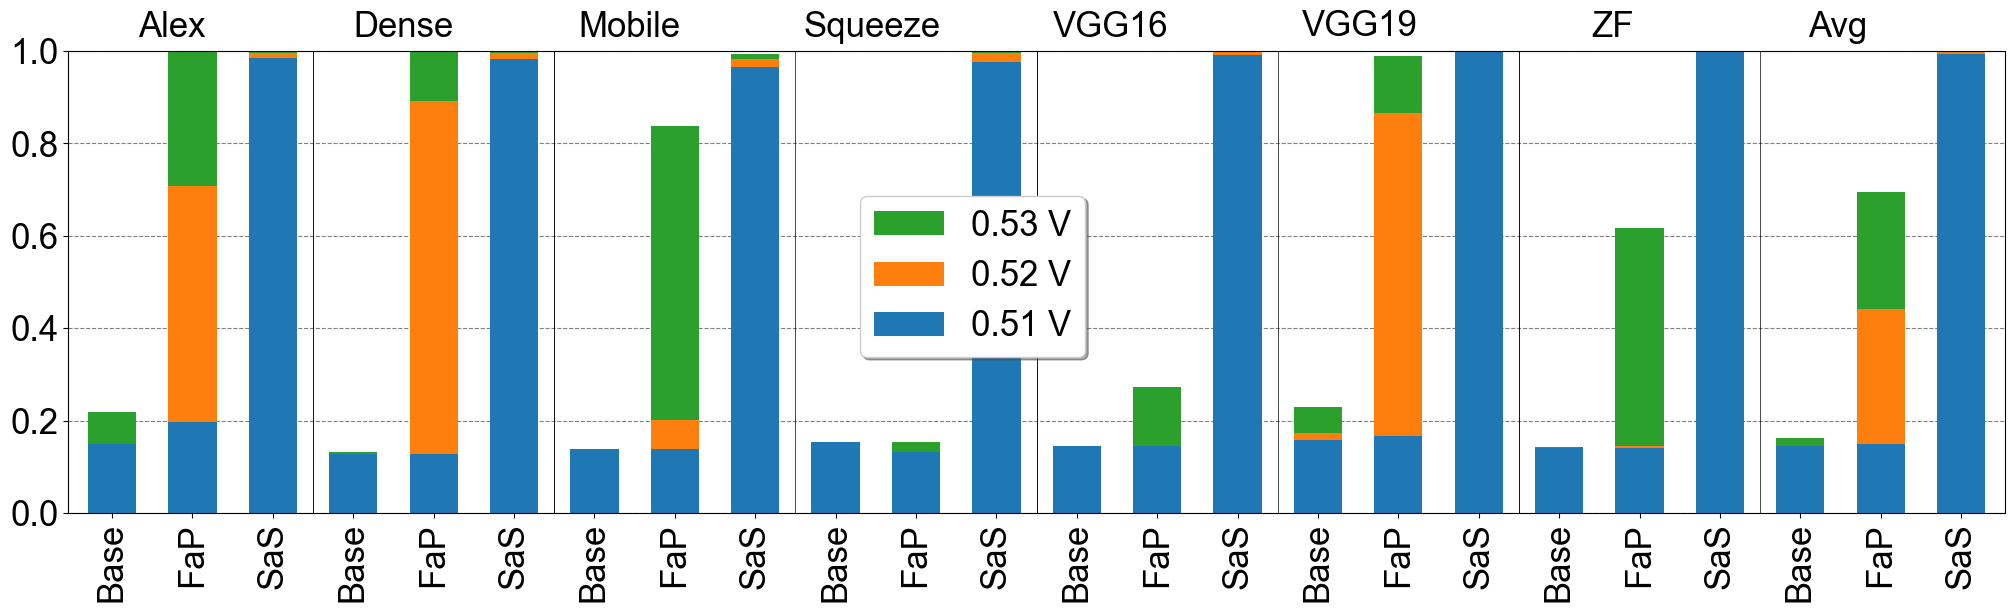

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile

#plt.rcParams['font.size'] = 33  # Tamaño de letra
#plt.rcParams['font.family'] = 'serif'  # Tipo de letra
#plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

plt.rcParams['font.size'] = 25  # Tamaño de letra
plt.rcParams['font.family'] = 'Arial'


n = len(acc_by_tech.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
#coloresRedes = ['#ff7f0e', 'green','dodgerblue']
#coloresRedes = ['#ffbb78', '#1f77b4','#7f7f7f']
coloresRedes = ['#1f77b4','#ff7f0e', '#2ca02c' ]
#coloresRedes = ['#d62728', '#2ca02c', '#9467bd']

#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

bars=acc_by_tech.plot(kind ='bar' ,stacked = True,width = 0.60, color = coloresRedes, figsize=(25,6), zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

#plt.ylabel('Normalized accuracy')
plt.xticks(x, acc_by_tech.index )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0,1)
#bars.set_ylim(bottom=0, top=3)

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')
#plt.xticks([])




handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
legend1=plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc ="lower left",
           bbox_to_anchor=(0.4,0.3),shadow = True)

#plt.legend(fontsize=14,loc ="lower left", shadow = True)
#["0.58","0.56","0.54"]





plt.axvline(x=2.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=5.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=8.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=11.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=14.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=17.5, ymax= 1, color="black", linewidth=0.5)





plt.text(0.32, 1.03, 'Alex')
plt.text(3, 1.03, 'Dense')
plt.text(5.8, 1.03, 'Mobile' )
plt.text(8.6,1.03, 'Squeeze')
plt.text(11.7, 1.03, 'VGG16')
plt.text(14.8, 1.033, 'VGG19')
plt.text(18.4, 1.03, 'ZF')
plt.text(21.1, 1.03, 'Avg')





#legend2 = plt.legend(['0.54 V'], loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.89))
#custom_legend = [Line2D([0], [0], color='red', lw=1.7, label='0.54 V')]
#plt.legend(handles=custom_legend, loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.875),shadow = True)
#plt.gca().add_artist(legend1)
plt.axvline(x=2.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#Dense
#plt.axvline(x=8.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#mobil
#plt.axvline(x=14.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=20.5, ymax= 5, color="black",linewidth=0.5)#vgg16
#plt.axvline(x=23.5, ymax= 5, color="black",linewidth=0.5)#vgg19
#plt.axvline(x=26.5, ymax= 5, color="black",linewidth=0.5)#xcep
plt.axvline(x=29.5, ymax= 5, color="black",linewidth=0.5)#zf
plt.savefig('Mors_acc_by_tech_modif_7nets.png', transparent = True, bbox_inches = 'tight', pad_inches = 0)

In [52]:
import pandas as pd
time_Mors=pd.read_excel('MoRS/Analisis_Resultados/Energía_VBW/final_prestaciones_energia_SaS.xlsx',sheet_name='time_ex_tesis', usecols=["Redes","FaP" ,"SaS-0.53","SaS-0.52","SaS-0.51"])
time_Mors= time_Mors.set_index("Redes")

df = pd.DataFrame(time_Mors)

time_Mors

,FaP,SaS-0.53,SaS-0.52,SaS-0.51
Redes,,,,
Alex,1.000004,1.001464,1.004950,1.044329
Dense,1.000070,1.015102,1.050106,1.454449
Mobile,1.000050,1.008055,1.026209,1.232786
Squeeze,1.000026,1.007128,1.024313,1.217550
VGG16,1.000012,1.000457,1.001544,1.014068
VGG19,1.000011,1.001227,1.004180,1.038473
ZF,1.000006,1.001072,1.003489,1.031549
Avg,1.000025,1.004929,1.016399,1.147600


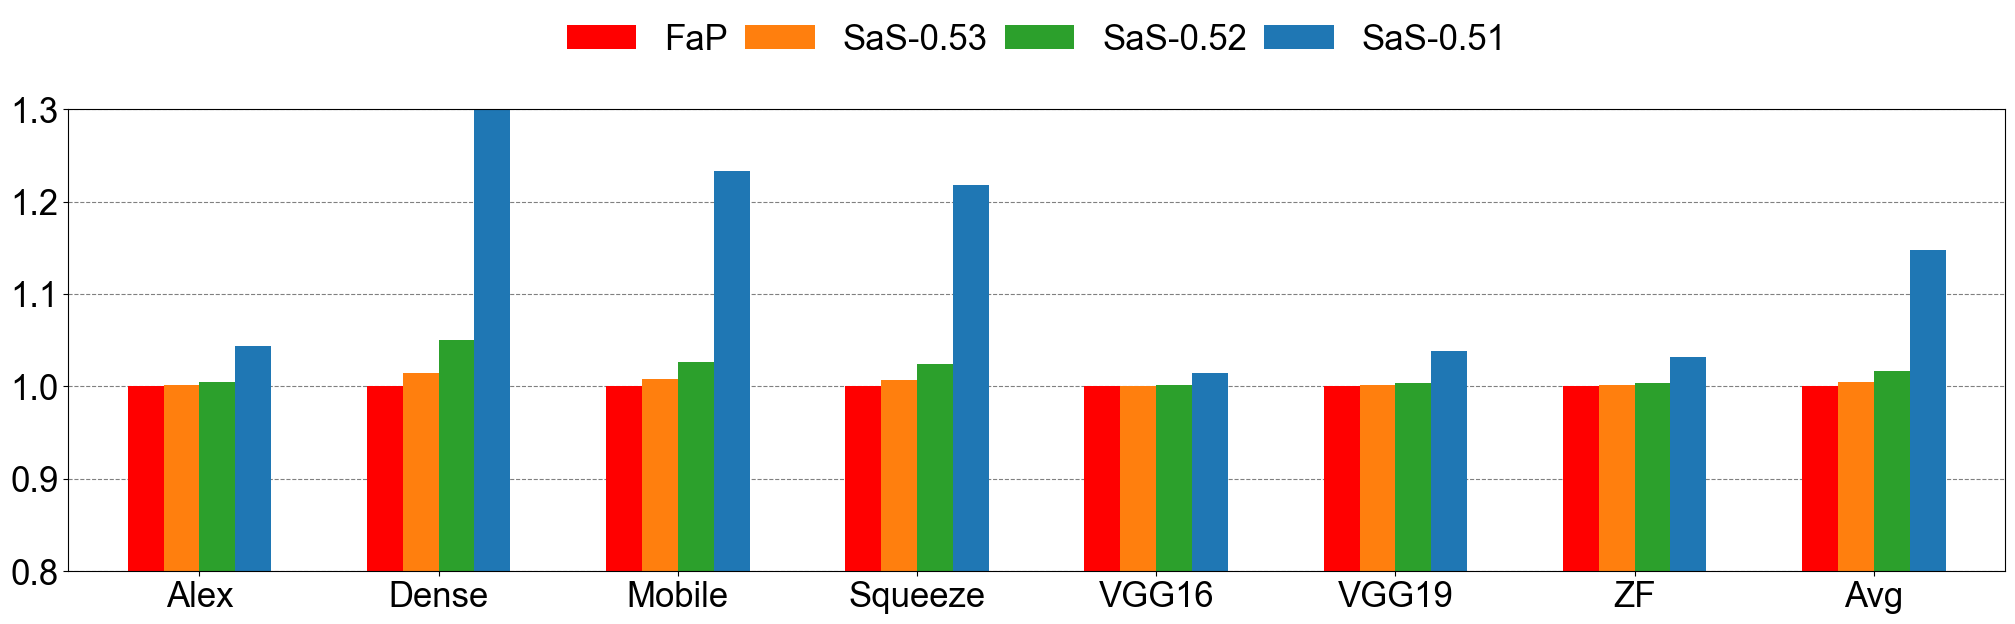

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile


#plt.rcParams['font.size'] = 12  # Tamaño de letra
#plt.rcParams['font.family'] = 'serif'  # Tipo de letra
#plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif


plt.rcParams['font.size'] = 25  # Tamaño de letra
plt.rcParams['font.family'] = 'Arial'

#plt.rcParams['axes.titlesize'] = 12  # Tamaño del título de los ejes
#plt.rcParams['axes.labelsize'] = 12 # Tamaño de las etiquetas de los ejes
#plt.rcParams['legend.fontsize'] = 12  # Tamaño de la fuente de las leyendas
#plt.rcParams['xtick.labelsize'] = 12  # Tamaño de las etiquetas del eje x
#plt.rcParams['ytick.labelsize'] = 12  # Tamaño de las etiquetas del eje y

n = len(time_Mors.index)
x = np.arange(n)
coloresRedes = ['#FF0000','#ff7f0e', '#2ca02c','#1f77b4', ]
#coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(15,5), dpi=100)

bars=time_Mors.plot(kind ='bar' ,stacked = False,width = 0.60, color = coloresRedes,figsize=(25,6), zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

#plt.ylabel('Relative execution time')
plt.xticks(x, time_Mors.index )

lg = plt.legend(  loc ="center", bbox_to_anchor=(0.5,1.15),shadow = True, ncol=4, columnspacing=0.5)
lg.draw_frame(False)
#plt.legend(  loc ="center right",bbox_to_anchor=(0.,0.45), shadow = True)
plt.ylim(0.8,1.30)
#bars.set_ylim(bottom=0, top=3)
plt.yticks(np.arange(0.8, 1.31, step=0.1))
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

#plt.xlabel('', fontsize=12)
plt.xlabel('')
#plt.xticks([])

plt.grid(axis='y', color = 'gray', linestyle = 'dashed')

plt.savefig('performance_7_nets.png', transparent = True, bbox_inches = 'tight', pad_inches = 0)



In [60]:
import pandas as pd
Energia_Mors=pd.read_excel('MoRS/Analisis_Resultados/Energía_VBW/final_prestaciones_energia_SaS.xlsx',sheet_name='energy_tesis', usecols=["Redes","TUV", "FaP" ,"SaS-0.53","SaS-0.52","SaS-0.51"])
Energia_Mors= Energia_Mors.set_index("Redes")

df = pd.DataFrame(Energia_Mors)

Energia_Mors

,TUV,FaP,SaS-0.53,SaS-0.52,SaS-0.51
Redes,,,,,
Alex,0.949003,0.939779,0.917858,0.881082,0.873377
Dense,0.934605,0.935519,0.925599,0.914828,1.199131
Mobile,0.973134,0.935983,0.919876,0.895176,1.021598
Squeeze,0.966081,0.935377,0.918434,0.892850,1.007563
VGG16,0.974327,0.940426,0.917565,0.878725,0.848542
VGG19,0.963937,0.940212,0.918061,0.880826,0.868779
ZF,0.955994,0.940103,0.917820,0.880127,0.862993
Avg,0.959583,0.938200,0.919316,0.889088,0.954569


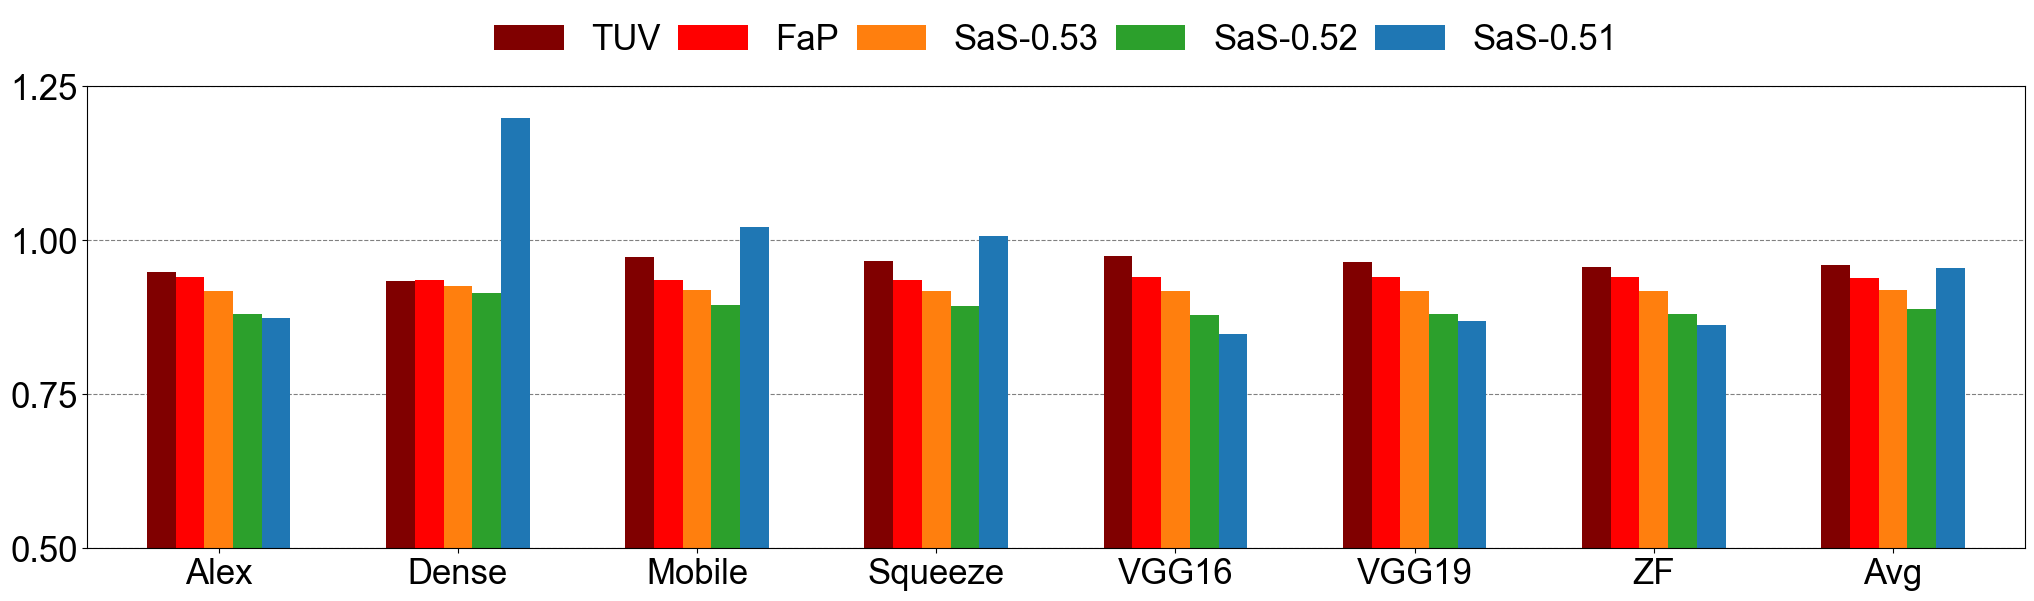

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile


#plt.rcParams['font.size'] = 12  # Tamaño de letra
#plt.rcParams['font.family'] = 'serif'  # Tipo de letra
#plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

plt.rcParams['font.size'] = 25  # Tamaño de letra
plt.rcParams['font.family'] = 'Arial'

n = len(Energia_Mors.index)
x = np.arange(n)
coloresRedes = ['#800000','#FF0000','#ff7f0e', '#2ca02c','#1f77b4', ]
#coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(15,5), dpi=100)

bars=Energia_Mors.plot(kind ='bar' ,stacked = False,width = 0.60, color = coloresRedes,figsize=(25,6), zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

#plt.ylabel('Normalized energy')
plt.xticks(x, Energia_Mors.index )

lg = plt.legend(  loc ="center", bbox_to_anchor=(0.5,1.1),shadow = True, ncol=5, columnspacing=0.5)
lg.draw_frame(False)
#plt.legend(  loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0.5,1.25)
#bars.set_ylim(bottom=0, top=3)
plt.yticks(np.arange(0.5, 1.26, step=0.25))
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

#plt.xlabel('', fontsize=12)
plt.xlabel('')
#plt.xticks([])

plt.grid(axis='y', color = 'gray', linestyle = 'dashed')




plt.savefig('energia_Mors_7nets.png', transparent = True, bbox_inches = 'tight', pad_inches = 0)